In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [2]:
df = sb.load_dataset("iris") 
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
def sigmoid(z):
    z=float(z)
    if(z>=0):
        return 1/(1+np.exp(-z))
    return np.exp(z)/(1+np.exp(z))
print(sigmoid(30))

0.9999999999999065


In [4]:
def logisticRegression(Xdf, Ydf):
    Xdf["bias"]=1
    X=Xdf.values
    Y=Ydf.values
    d=X.shape[1]
    W=np.zeros((d,1))
    learningRate = 0.01
    iterationCount=5000
    for i in range(iterationCount):
        Ypredicted=np.array([sigmoid(W.T @ x) for x in X])
        delY = Ypredicted - Y
        gradient = X.T @ delY
        W = W - learningRate*gradient 
    return W
    
# le = LabelEncoder() 
# print(logisticRegression(df.iloc[:,0:4],pd.DataFrame(le.fit_transform(df["species"]),columns=["label"])))

In [5]:
def multinomialLogisticRegression(Xdf, Ydf): # one vs all approach
    labels=Ydf.unique()
    W = dict()
    for l in labels:
        Y = pd.DataFrame([1 if it==l else 0 for it in Ydf],columns=["label"])
        w=logisticRegression(Xdf,Y)
        W[l]=w
    return W,labels
        
# W = multinomialLogisticRegression(df.iloc[:,0:4], df["species"])


In [6]:
def predict(W,labels,x):
    maxVal = -np.inf
    prediction = 0 
    x = np.array(x)
    for l in labels:
        w = np.array(W[l])
        prob = sigmoid(w.T @ x)
        if(prob>maxVal):
            maxVal = prob
            prediction = l 
    return prediction 

In [7]:
Xdf = df.drop(["species"],axis=1)
ss = StandardScaler()
Xdf = pd.DataFrame(ss.fit_transform(Xdf),columns=Xdf.columns)
Ydf = df["species"]
# weights = multinomialLogisticRegression(Xdf, Ydf)
# # print(weights)
# labels = Ydf.unique()
# Xdf["bias"] = 1
# predictions = [predict(weights,labels,x) for x in Xdf.values]
# # for i in range(140):
# #     # print(predictions[i])
# #     print(predictions[i] == Ydf.values[i])
# accuracy = np.mean(predictions == Ydf.values)
# print(accuracy)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(Xdf, Ydf, random_state=42, stratify=Ydf, test_size=0.3)
X_test["bias"]=1
accuracyVal=[]
percentageData=[]
for i in range(10,len(X_train)+1,10):
    X = X_train.iloc[0:i,:]
    X=X.copy()
    Y = Y_train.iloc[0:i]
    weights,labels = multinomialLogisticRegression(X, Y)
    predictions = [predict(weights,labels,x) for x in X_test.values]
    # print(predictions)
    accuracy = np.mean(predictions == Y_test.values)
    accuracyVal.append(accuracy)
    percentageData.append(100*(i/(len(X_train))))


C:\Users\anagh\AppData\Local\Temp\ipykernel_23284\460383231.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z=float(z)


TypeError: only length-1 arrays can be converted to Python scalars

          Y          X
0  0.755556   9.523810
1  0.666667  19.047619
2  0.866667  28.571429
3  0.866667  38.095238
4  0.911111  47.619048
5  0.911111  57.142857
6  0.911111  66.666667
7  0.911111  76.190476
8  0.911111  85.714286
9  0.911111  95.238095


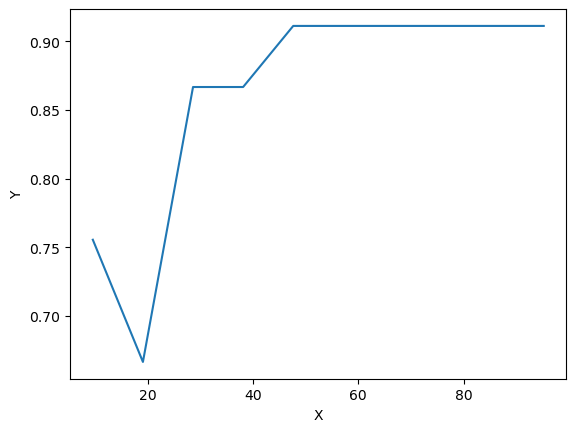

In [280]:
accuracyDF=pd.DataFrame({"Y":accuracyVal, "X":percentageData});
print(accuracyDF)

sb.lineplot(data=accuracyDF, x="X", y="Y")
plt.xlabel="percentage of training data used"
plt.ylabel="Accuracy"
plt.show()

In [283]:
X_test = Xdf.copy() 
X_test["bias"]=1
Y_test = Ydf.copy()
accuracyVal=[]
percentageData=[]
for i in range(10,len(Xdf)+1,10):
    X = Xdf.iloc[0:i,:]
    X=X.copy()
    Y = Ydf.iloc[0:i]
    weights,labels = multinomialLogisticRegression(X, Y)
    predictions = [predict(weights,labels,x) for x in X_test.values]
    # print(predictions)
    accuracy = np.mean(predictions == Y_test.values)
    accuracyVal.append(accuracy)
    percentageData.append(100*(i/(len(Xdf))))


           Y           X
0   0.333333    6.666667
1   0.333333   13.333333
2   0.333333   20.000000
3   0.333333   26.666667
4   0.333333   33.333333
5   0.666667   40.000000
6   0.666667   46.666667
7   0.666667   53.333333
8   0.666667   60.000000
9   0.666667   66.666667
10  0.880000   73.333333
11  0.960000   80.000000
12  0.966667   86.666667
13  0.966667   93.333333
14  0.966667  100.000000


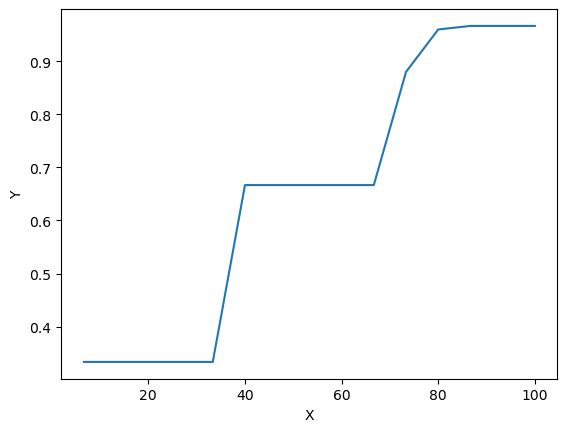

In [284]:
accuracyDF=pd.DataFrame({"Y":accuracyVal, "X":percentageData});
print(accuracyDF)

sb.lineplot(data=accuracyDF, x="X", y="Y")
plt.xlabel="percentage of training data used"
plt.ylabel="Accuracy"
plt.show()